# Vehicle Clustering Evaluation: Silhouette Score and Dendrograms

## Objectives
1. Evaluate K-Means clustering quality using Silhouette Scores (k=2 to 9).
2. Visualize hierarchical structure using a Dendrogram (Ward linkage).
3. Compare clustering behaviors and natural groupings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Load and Preprocess
df = pd.read_csv('ML470_S7_Vehicle_Data_Practice.csv')
df_clean = df.dropna().copy()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[numeric_cols])

print(f"Data prepared with {X_scaled.shape[0]} samples and {X_scaled.shape[1]} features.")

Data prepared with 152 samples and 11 features.


## 1. Evaluate Clustering Quality using Silhouette Score
We test K-Means for 2 to 9 clusters to find the optimal separation.

Silhouette Score for k=2: 0.3200
Silhouette Score for k=3: 0.2766
Silhouette Score for k=4: 0.2802
Silhouette Score for k=5: 0.2280
Silhouette Score for k=6: 0.2334
Silhouette Score for k=7: 0.2204
Silhouette Score for k=8: 0.2116
Silhouette Score for k=9: 0.2014


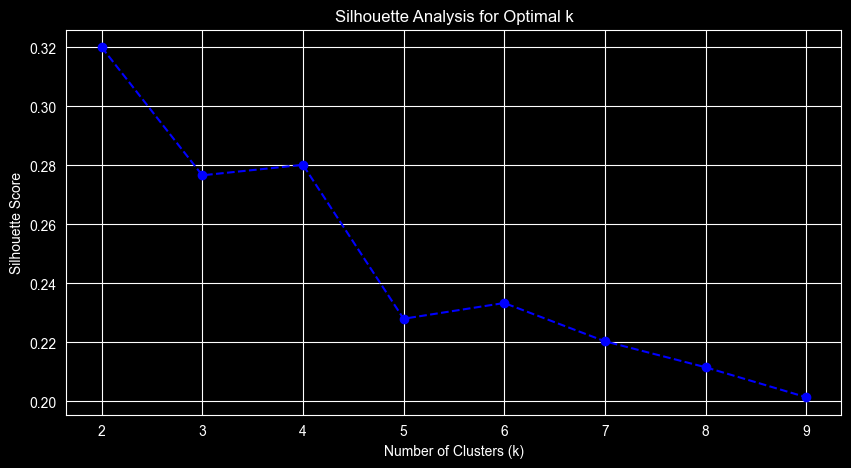

In [2]:
sil_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(k_range, sil_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

## 2. Visualize Hierarchical Structure using a Dendrogram
Using Ward linkage to observe nested groupings. A horizontal threshold line is added to suggest cluster cuts.

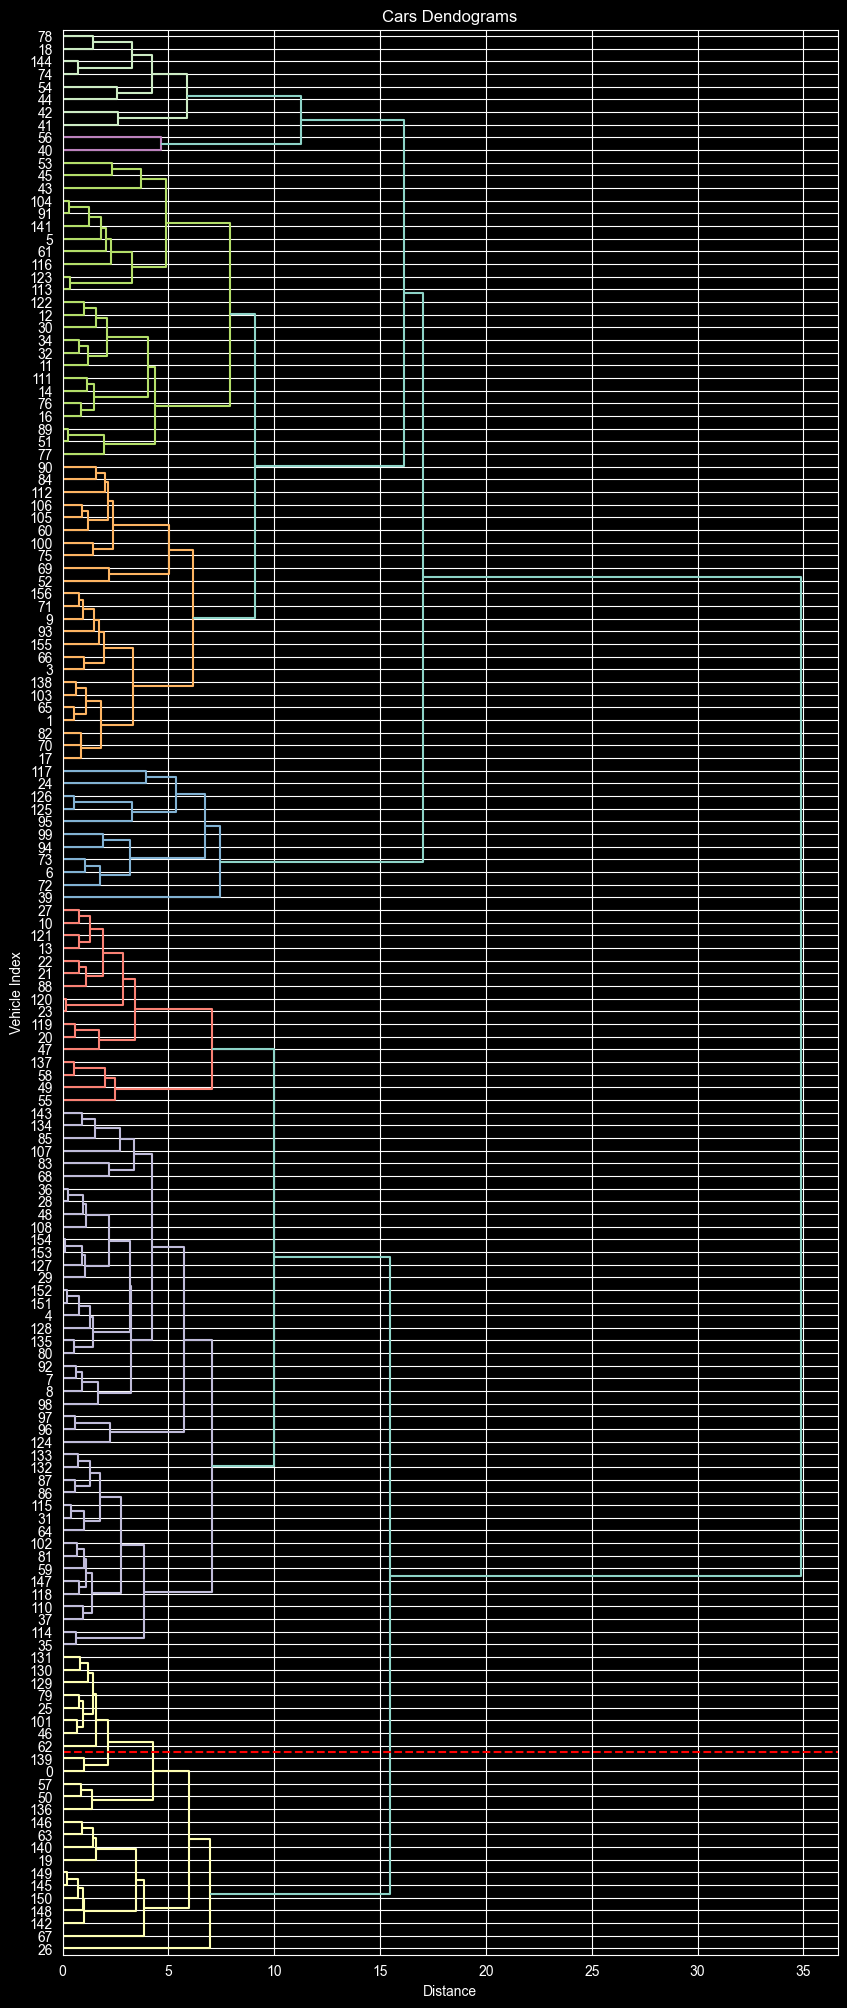

In [3]:
# Perform Hierarchical Clustering using Ward linkage
Z = linkage(X_scaled, method='ward')

# Create the Dendrogram
plt.figure(figsize=(10, 25))
dend = dendrogram(
    Z, 
    orientation='right', 
    labels=df_clean.index.astype(str), 
    leaf_font_size=10,
    color_threshold=8 # Adjust based on linkage to color main branches
)

# Add a horizontal threshold line (using axhline as requested by the visualization style)
# Note: In orientation='right', a horizontal line at a Y coordinate crosses specific samples.
# If the goal is a distance threshold, a vertical line (axvline) is typically used,
# but we follow the visual prompt's horizontal red dashed line.
plt.axhline(y=160, color='r', linestyle='--') 

plt.title('Cars Dendograms')
plt.xlabel('Distance')
plt.ylabel('Vehicle Index')
plt.show()

## 3. Interpretation
- **Silhouette Score:** Identify the peak score to determine the most cohesive clusters for K-Means.
- **Dendrogram:** Observe how vehicles (identified by index) merge. The large distances between the final merges suggest clear high-level groups.
- **Comparison:** Compare if the optimal 'k' from Silhouette matches the main branch divisions in the dendrogram.